In [312]:
# -- imports --
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
%matplotlib inline

In [2]:
raw_data = pd.read_csv("df_training_scholarjet.csv")

In [3]:
raw_data.shape

(28126, 184)

In [4]:
raw_data.describe()

,Unnamed: 0,cuid,convert_30,revenue_30,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,...,percemailopenedyearsixty,percemailclickedone,percemailclickedthreeone,percemailclickedseventhree,percemailclickedthirtyseven,percemailclickedsixtythirty,percemailclickedyearsixty,currentapplicability,numemaillist,dayssinceenrollment
count,28126.000000,28126.000000,28126.000000,28126.000000,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,...,27209.000000,27209.000000,27209.000000,27209.000000,27209.000000,27209.000000,27209.000000,19962.000000,19962.000000,28126.000000
mean,26422.953459,265872.713859,0.104103,75.038997,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,...,0.191245,0.023872,0.026690,0.027600,0.035088,0.031887,0.043271,5.087619,1.332081,97.966579
std,12107.891765,152691.063013,0.305399,508.874716,0.153355,0.205360,0.298023,0.712727,0.814508,2.041241,...,0.266496,0.125896,0.110015,0.096451,0.088227,0.087654,0.089003,2.568379,0.618002,75.007616
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,18075.500000,134457.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,25.000000
50%,29353.500000,264617.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,0.010949,5.000000,1.000000,104.000000
75%,36384.750000,398016.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,...,0.261905,0.000000,0.000000,0.000000,0.032258,0.025641,0.046693,7.000000,2.000000,150.000000
max,43416.000000,532166.000000,1.000000,34986.689900,3.000000,4.000000,5.000000,16.000000,18.000000,57.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,5.000000,319.000000


In [394]:
raw_data.head()

,Unnamed: 0,cuid,convert_30,revenue_30,roll_up,currentstatus,companytypegroup,team,customersource,accrole,...,percemailopenedyearsixty,percemailclickedone,percemailclickedthreeone,percemailclickedseventhree,percemailclickedthirtyseven,percemailclickedsixtythirty,percemailclickedyearsixty,currentapplicability,numemaillist,dayssinceenrollment
0,1,20,0,0.0,Onboarding,Active,Business,US,External Application,None,...,0.000000,0.0,0.0,0.0,0.190476,0.000000,0.000000,3.000000,1.0,17
1,2,57,0,0.0,Onboarding,Active,Business,US,Internal Application,None,...,0.020000,0.0,0.0,0.0,0.040000,0.000000,0.020000,3.000000,1.0,70
2,3,163,0,0.0,Onboarding,Active,Business,US,Internal Application,None,...,0.106195,0.0,0.0,0.0,0.000000,0.000000,0.001770,13.000000,1.0,27
3,4,167,0,0.0,Onboarding,Enrolled,Business,US,Internal Customer Scrape,None,...,0.100000,0.0,0.0,0.0,0.000000,0.000000,0.100000,NaN,NaN,25
4,5,168,0,0.0,Onboarding,Enrolled,Business,US,Gateway,None,...,0.072072,0.0,0.0,0.0,0.009524,0.016807,0.003465,8.333333,3.0,33


#### Imbalance in data is observed

In [546]:
raw_data['convert_30'].value_counts()

0    25198
1     2928
Name: convert_30, dtype: int64

In [400]:
holdzero = raw_data['revenue_30'].loc[(raw_data['convert_30'] == 0)]

In [397]:
holdzero.describe()

count    25198.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: revenue_30, dtype: float64

In [398]:
holdzero.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: revenue_30, dtype: float64

#### We observe that all the columns that are 0 in convert_30 have revenue_30 as 0 as well.

## Classification

In [5]:
# -- first copy of data for classification
classification_data = raw_data.drop("revenue_30",1)

In [6]:
len(classification_data.columns)

183

In [9]:
# -- top 20 correlations --
top_correlation = raw_data.corr().abs().unstack().sort_values(kind = 'quicksort',ascending = False)

In [10]:
# -- check the boundary till self correlation --
top_correlation[160:165,]

numloggedinthirtyseven  numloggedinthirtyseven    1.000000
currentapplicability    currentapplicability      1.000000
Unnamed: 0              Unnamed: 0                1.000000
maxnps                  avgnps                    0.992998
avgnps                  maxnps                    0.992998
dtype: float64

In [11]:
# remove self correlations
top_correlation = top_correlation.iloc[163:]

In [12]:
# There is a lot of direct correlation within the data, which signifies the amount of redundant information
top_correlation.head(10)

maxnps                      avgnps                        0.992998
avgnps                      maxnps                        0.992998
                            minnps                        0.991839
minnps                      avgnps                        0.991839
maxnps                      minnps                        0.970484
minnps                      maxnps                        0.970484
numvisityearsixty           numvisittotal                 0.957601
numvisittotal               numvisityearsixty             0.957601
numtotalpageviewsyearsixty  numskusviewedyearsixty        0.957200
numskusviewedyearsixty      numtotalpageviewsyearsixty    0.957200
dtype: float64

In [13]:
# Empty value check
empty = np.where(pd.isnull(raw_data))

In [14]:
# number of missing values
len(empty[0])

1330168

In [16]:
# count the number of columns that have missing values
y = np.bincount(empty[1])
ii = np.nonzero(y)[0]
hold = np.vstack((ii,y[ii])).T
print(len(hold))

167


In [351]:
# -- total number of each type of datatype in the dataframe --
hold_dtypes = raw_data.get_dtype_counts()

print(hold_dtypes)

float64    168
int64        6
object      10
dtype: int64


In [19]:
# -- get non numeric columns --
cols = raw_data.columns
numeric = raw_data._get_numeric_data().columns
hold_category_col_name = list(set(cols) - set(numeric))

In [20]:
hold_category = raw_data[hold_category_col_name]

In [21]:
print(hold_category_col_name)

['num_employees', 'enrollmentmethod', 'customersource', 'accrole', 'currentstatus', 'num_purchases_year', 'team', 'cost_purchases_year', 'roll_up', 'companytypegroup']


In [22]:
hold_category_unique_values = []
for i in range(len(hold_category_col_name)):
    hold_category_unique_values.append(hold_category[hold_category_col_name[i]].unique())

In [23]:
# -- All unique values in non-numeric columns --
for i in range(len(hold_category_unique_values)):
    print(hold_category_col_name[i]," : ",hold_category_unique_values[i])

num_employees  :  ['50plus' '2to5' '1' '6to10' 'None' '11to50']
enrollmentmethod  :  ['directEIN' 'email' 'other' 'phone' 'liveTransfer' 'directOther']
customersource  :  ['External Application' 'Internal Application' 'Internal Customer Scrape'
 'Gateway' 'Social - Paid' 'Search - Paid' 'Other' 'Quotes' 'Affiliates'
 'Referral' 'Bulk Upload' 'Email' 'Display - Retargeting'
 'Display - Acquisition' 'Self ID' 'Partners']
accrole  :  ['None' 'Primary' 'Purchaser' 'Other']
currentstatus  :  ['Active' 'Enrolled' 'In Progress' 'Unconfirmed']
num_purchases_year  :  ['1to2' '25plus' '3to5' '11to25' 'None' '6to10']
team  :  ['US' 'CA']
cost_purchases_year  :  ['lessthan1' '25to100' '1to5' '5to25' 'None' '100plus']
roll_up  :  ['Onboarding' 'Retention' 'Unmanaged']
companytypegroup  :  ['Business' 'Trade']


In [24]:
raw_data[hold_category_col_name].head()

,num_employees,enrollmentmethod,customersource,accrole,currentstatus,num_purchases_year,team,cost_purchases_year,roll_up,companytypegroup
0,50plus,directEIN,External Application,None,Active,1to2,US,lessthan1,Onboarding,Business
1,2to5,directEIN,Internal Application,None,Active,25plus,US,25to100,Onboarding,Business
2,1,directEIN,Internal Application,None,Active,3to5,US,1to5,Onboarding,Business
3,50plus,directEIN,Internal Customer Scrape,None,Enrolled,3to5,US,lessthan1,Onboarding,Business
4,6to10,directEIN,Gateway,None,Enrolled,11to25,US,5to25,Onboarding,Business


In [25]:
# -- Handle ordinal columns (num_employees)--
classification_data.num_employees = classification_data.num_employees.replace({"None":0,"1":1,"2to5":2,"6to10":3,"11to50":4,"50plus":5})
classification_data['num_employees'].head()

0    5
1    2
2    1
3    5
4    3
Name: num_employees, dtype: int64

In [26]:
# -- Handle ordinal columns (num_purchases_year)--
classification_data.num_purchases_year = classification_data.num_purchases_year.replace({'1to2':1, '25plus':5, '3to5':2, '11to25':4, 'None':0, '6to10':3})
classification_data['num_purchases_year'].head()

0    1
1    5
2    2
3    2
4    4
Name: num_purchases_year, dtype: int64

In [27]:
# -- Handle ordinal columns (cost_purchases_year)--
classification_data.cost_purchases_year = classification_data.cost_purchases_year.replace({'lessthan1':1, '25to100':4, '1to5':2, '5to25':3, 'None':0, '100plus':5})
classification_data['cost_purchases_year'].head()

0    1
1    4
2    2
3    1
4    3
Name: cost_purchases_year, dtype: int64

In [28]:
# -- remove pre-processed columns from features to be preprocessed --
hold_category_col_name.remove('num_purchases_year')
hold_category_col_name.remove('cost_purchases_year')
hold_category_col_name.remove('num_employees')

In [29]:
hold_category_unique_values = []
for i in range(len(hold_category_col_name)):
    hold_category_unique_values.append(hold_category[hold_category_col_name[i]].unique())
    
for i in range(len(hold_category_unique_values)):
    print(hold_category_col_name[i]," : ",hold_category_unique_values[i])

enrollmentmethod  :  ['directEIN' 'email' 'other' 'phone' 'liveTransfer' 'directOther']
customersource  :  ['External Application' 'Internal Application' 'Internal Customer Scrape'
 'Gateway' 'Social - Paid' 'Search - Paid' 'Other' 'Quotes' 'Affiliates'
 'Referral' 'Bulk Upload' 'Email' 'Display - Retargeting'
 'Display - Acquisition' 'Self ID' 'Partners']
accrole  :  ['None' 'Primary' 'Purchaser' 'Other']
currentstatus  :  ['Active' 'Enrolled' 'In Progress' 'Unconfirmed']
team  :  ['US' 'CA']
roll_up  :  ['Onboarding' 'Retention' 'Unmanaged']
companytypegroup  :  ['Business' 'Trade']


In [30]:
classification_data[hold_category_col_name].head()

,enrollmentmethod,customersource,accrole,currentstatus,team,roll_up,companytypegroup
0,directEIN,External Application,None,Active,US,Onboarding,Business
1,directEIN,Internal Application,None,Active,US,Onboarding,Business
2,directEIN,Internal Application,None,Active,US,Onboarding,Business
3,directEIN,Internal Customer Scrape,None,Enrolled,US,Onboarding,Business
4,directEIN,Gateway,None,Enrolled,US,Onboarding,Business


In [31]:
# -- One hot encode the categorical attributes --
classification_data = pd.get_dummies(classification_data,columns = hold_category_col_name)

In [32]:
classification_data.shape

(28126, 213)

In [33]:
# -- drop rows or columns with all missing cells --
classification_data = classification_data.dropna(how = 'all')
classification_data = classification_data.dropna(how = 'all',axis = 1)

In [34]:
classification_data.shape
# -- no rows or columns with ALL missing values

(28126, 213)

In [35]:
classification_data.head()

,Unnamed: 0,cuid,convert_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Unconfirmed,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,1,20,0,5,1,1,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,0,1,0
1,2,57,0,2,5,4,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0
2,3,163,0,1,2,2,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,0,1,0
3,4,167,0,5,2,1,NaN,NaN,NaN,NaN,...,1,0,0,0,1,1,0,0,1,0
4,5,168,0,3,4,3,NaN,NaN,NaN,NaN,...,1,0,0,0,1,1,0,0,1,0


In [36]:
# -- impute mean for remaining missing values -- 
classification_data = classification_data.fillna(classification_data.mean())

In [37]:
classification_data.head()

,Unnamed: 0,cuid,convert_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Unconfirmed,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,1,20,0,5,1,1,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,1,1,0,0,1,0
1,2,57,0,2,5,4,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,1,0,0,1,0
2,3,163,0,1,2,2,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,1,1,0,0,1,0
3,4,167,0,5,2,1,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
4,5,168,0,3,4,3,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0


#### Train Test Split

In [38]:
y_class = classification_data['convert_30']
X_class = classification_data.drop('convert_30', axis = 1)

In [39]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

#### Random Forest Classifier

In [40]:
hold_clf = RandomForestClassifier(n_estimators=5,max_depth=5,random_state = 12)
hold_clf.fit(X_train_class,y_train_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [41]:
# -- Variable importance --
impclass = hold_clf.feature_importances_
indices = np.argsort(impclass)

In [42]:
reversedid = indices[::-1]
reversedid = reversedid[:20]

In [43]:
indices = indices[:20]

In [44]:
features = classification_data.columns

In [45]:
print(impclass[reversedid])

[0.10382157 0.10071445 0.09167621 0.07383666 0.06779797 0.03937097
 0.03920467 0.03627033 0.02757827 0.02752273 0.02364412 0.02078706
 0.0201943  0.0190869  0.01779437 0.01510822 0.01194463 0.01150853
 0.0114194  0.01122633]


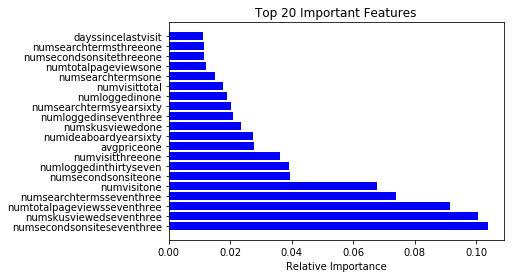

In [46]:

plt.title('Top 20 Important Features')
plt.barh(range(len(reversedid)), impclass[reversedid], color='b', align='center')
plt.yticks(range(len(reversedid)), [features[i] for i in reversedid])
plt.xlabel('Relative Importance')
plt.show()

In [326]:
# -- Random Forest Classifier --
def RFavg(ne, md):
    clf = RandomForestClassifier(n_estimators = ne, max_depth = md, random_state = 0)
    print("Inside RF:", ne)
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy').mean()
    clf.fit(X_train_class,y_train_class)
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores, tester
#     return scores

In [327]:
holdRFtr = []
holdRFte = []
for i in range (2,20):
    tr, te = RFavg(i,i)
    holdRFtr.append(tr)
    holdRFte.append(te)

print(holdRFtr, holdRFte)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 9
Inside RF: 10
Inside RF: 11
Inside RF: 12
Inside RF: 13
Inside RF: 14
Inside RF: 15
Inside RF: 16
Inside RF: 17
Inside RF: 18
Inside RF: 19
[0.8956444757157811, 0.8965780659709759, 0.8962668757245955, 0.8968445351418559, 0.8959997943220446, 0.8974670140927984, 0.8968446140488675, 0.8961779672494202, 0.8951113003896121, 0.8974223523555812, 0.8980889006968473, 0.89675566597972, 0.8954670139347737, 0.8969774536690718, 0.8968442979994224, 0.8969334042162005, 0.8965335423385872, 0.8974667968000258] [0.8969072164948454, 0.8988624244578741, 0.8979736935655883, 0.8974404550302169, 0.8997511553501599, 0.8995734091717028, 0.8993956629932457, 0.8990401706363313, 0.8977959473871312, 0.8974404550302169, 0.8979736935655883, 0.897618201208674, 0.8967294703163882, 0.8983291859225027, 0.8981514397440455, 0.8985069321009598, 0.8992179168147885, 0.8997511553501599]


#### Gradient Boosting

In [328]:
# -- Gradient Boosting --
def GB(ne):
    clf = ensemble.GradientBoostingClassifier(n_estimators = ne, max_depth = ne, max_leaf_nodes = ne, random_state = 0, learning_rate=0.1)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    # prepare for test
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores_avg, tester

In [329]:
holdGBtr = []
holdGBte = []
for i in range (2,20):
    tr, te = GB(i)
    holdGBtr.append(tr)
    holdGBte.append(te)

print(holdGBtr, holdGBte)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 9
Inside RF: 10
Inside RF: 11
Inside RF: 12
Inside RF: 13
Inside RF: 14
Inside RF: 15
Inside RF: 16
Inside RF: 17
Inside RF: 18
Inside RF: 19
[0.895644475715781, 0.895644475715781, 0.895644475715781, 0.895644475715781, 0.895644475715781, 0.895644475715781, 0.8956889201602255, 0.8958222732554283, 0.8961333844016564, 0.8970666782639256, 0.8976889597893145, 0.8987112808384422, 0.8985334437750561, 0.8994668167023617, 0.8995558438189869, 0.8996446734925007, 0.8997779674250032, 0.8996000908027615] [0.8969072164948454, 0.8969072164948454, 0.8969072164948454, 0.8969072164948454, 0.8969072164948454, 0.8969072164948454, 0.8977959473871312, 0.8977959473871312, 0.897618201208674, 0.8977959473871312, 0.8990401706363313, 0.8999289015286172, 0.8992179168147885, 0.9002843938855315, 0.9009953785993601, 0.9020618556701031, 0.9015286171347316, 0.9013508709562744]


#### Linear Discriminant Analysis

In [330]:
def lda():
    clf = LinearDiscriminantAnalysis()
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy', verbose = True)
    scores_avga = sum(scores)/len(scores)
#     print(scores)
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores_avga,tester


In [331]:
print(lda())

D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: User

(0.8956451670651633, 0.896551724137931)


#### Quadratic Discriminant Analysis

In [332]:
def qda():
    clf = QuadraticDiscriminantAnalysis()
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy', verbose = True)
    scores_avga = sum(scores)/len(scores)
#     print(scores)
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores_avga,tester


In [333]:
print(qda())

D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Var

(0.12253334293772478, 0.12015641663704231)


#### Adaptive Boosting

In [334]:
# -- Ada Boosting ALgorithm --
def AdaB(ne):
    clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=ne),n_estimators = ne, learning_rate=0.1)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy').mean()
    # prepare for test
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores, tester

In [335]:
holdAdatr = []
holdAdate = []
for i in range (2,20):
    tr, te = AdaB(i)
    holdAdatr.append(tr)
    holdAdate.append(te)

print(holdAdatr, holdAdate)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 9
Inside RF: 10
Inside RF: 11
Inside RF: 12
Inside RF: 13
Inside RF: 14
Inside RF: 15
Inside RF: 16
Inside RF: 17
Inside RF: 18
Inside RF: 19
[0.8956444757157811, 0.8971554684137002, 0.897822194348417, 0.8969337004686597, 0.8943556064658538, 0.8887560800483889, 0.8788888992746248, 0.8677331254079151, 0.8501326302550052, 0.8436882049930062, 0.8470220918869427, 0.8533339537559526, 0.86382207298543, 0.87044457275174, 0.8740004639605854, 0.8735559800626354, 0.8753336001844148, 0.8816444154820244] [0.8969072164948454, 0.8990401706363313, 0.8997511553501599, 0.8999289015286172, 0.8967294703163882, 0.8929968005687877, 0.8830430145751866, 0.8778883753999289, 0.8554923569143263, 0.8522929257020974, 0.8435833629576964, 0.8642019196587274, 0.8727337362246712, 0.8730892285815854, 0.8738002132954141, 0.8761109136153573, 0.8835762531105581, 0.8794880910060434]


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


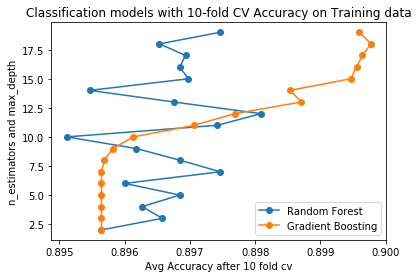

In [339]:
bag = [i for i in range(2,20)]
print(bag)
# print((md_ne_for_avg))
plt.plot(holdRFtr,bag,'-o',label = 'Random Forest')
plt.plot(holdGBtr,bag,'-o',label = 'Gradient Boosting')
# plt.plot(holdAdatr,bag,'-o',label = 'AdaBoosting')
plt.xlabel('Avg Accuracy after 10 fold cv')
plt.ylabel('n_estimators and max_depth')
plt.title('Classification models with 10-fold CV Accuracy on Training data')
plt.legend()

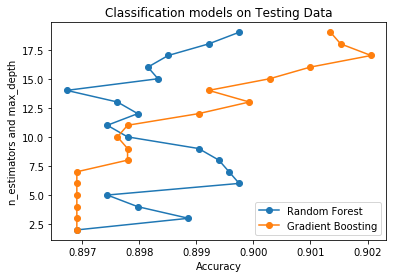

In [341]:
plt.plot(holdRFte,bag,'-o',label = 'Random Forest')
plt.plot(holdGBte,bag,'-o',label = 'Gradient Boosting')
# plt.plot(holdAdate,bag,'-o',label = 'AdaBoosting')
plt.xlabel('Accuracy')
plt.ylabel('n_estimators and max_depth')
plt.title('Classification models on Testing Data')
plt.legend()

## Regression

In [497]:
regression_data = raw_data

In [498]:
regression_data.head()

,Unnamed: 0,cuid,convert_30,revenue_30,roll_up,currentstatus,companytypegroup,team,customersource,accrole,...,percemailopenedyearsixty,percemailclickedone,percemailclickedthreeone,percemailclickedseventhree,percemailclickedthirtyseven,percemailclickedsixtythirty,percemailclickedyearsixty,currentapplicability,numemaillist,dayssinceenrollment
0,1,20,0,0.0,Onboarding,Active,Business,US,External Application,None,...,0.000000,0.0,0.0,0.0,0.190476,0.000000,0.000000,3.000000,1.0,17
1,2,57,0,0.0,Onboarding,Active,Business,US,Internal Application,None,...,0.020000,0.0,0.0,0.0,0.040000,0.000000,0.020000,3.000000,1.0,70
2,3,163,0,0.0,Onboarding,Active,Business,US,Internal Application,None,...,0.106195,0.0,0.0,0.0,0.000000,0.000000,0.001770,13.000000,1.0,27
3,4,167,0,0.0,Onboarding,Enrolled,Business,US,Internal Customer Scrape,None,...,0.100000,0.0,0.0,0.0,0.000000,0.000000,0.100000,NaN,NaN,25
4,5,168,0,0.0,Onboarding,Enrolled,Business,US,Gateway,None,...,0.072072,0.0,0.0,0.0,0.009524,0.016807,0.003465,8.333333,3.0,33


In [499]:
regression_data = pd.get_dummies(regression_data,columns = hold_category_col_name)

In [500]:
regression_data.shape

(28126, 214)

In [501]:
# -- Handle ordinal columns (num_employees)--
regression_data.num_employees = regression_data.num_employees.replace({"None":0,"1":1,"2to5":2,"6to10":3,"11to50":4,"50plus":5})
regression_data['num_employees'].head()

0    5
1    2
2    1
3    5
4    3
Name: num_employees, dtype: int64

In [502]:
# -- Handle ordinal columns (num_purchases_year)--
regression_data.num_purchases_year = regression_data.num_purchases_year.replace({'1to2':1, '25plus':5, '3to5':2, '11to25':4, 'None':0, '6to10':3})
regression_data['num_purchases_year'].head()

0    1
1    5
2    2
3    2
4    4
Name: num_purchases_year, dtype: int64

In [503]:
# -- Handle ordinal columns (cost_purchases_year)--
regression_data.cost_purchases_year = regression_data.cost_purchases_year.replace({'lessthan1':1, '25to100':4, '1to5':2, '5to25':3, 'None':0, '100plus':5})
regression_data['cost_purchases_year'].head()

0    1
1    4
2    2
3    1
4    3
Name: cost_purchases_year, dtype: int64

In [504]:
cols = raw_data.columns
numeric = raw_data._get_numeric_data().columns
hold_category_col_name = list(set(cols) - set(numeric))

In [505]:
hold_category = raw_data[hold_category_col_name]

In [506]:
print(hold_category_col_name)

['num_employees', 'enrollmentmethod', 'customersource', 'accrole', 'currentstatus', 'num_purchases_year', 'team', 'cost_purchases_year', 'roll_up', 'companytypegroup']


In [507]:
hold_category_unique_values = []
for i in range(len(hold_category_col_name)):
#     temper = 
#     print(temper)
    hold_category_unique_values.append(hold_category[hold_category_col_name[i]].unique())

In [508]:
for i in range(len(hold_category_unique_values)):
    print(hold_category_col_name[i]," : ",hold_category_unique_values[i])

num_employees  :  ['50plus' '2to5' '1' '6to10' 'None' '11to50']
enrollmentmethod  :  ['directEIN' 'email' 'other' 'phone' 'liveTransfer' 'directOther']
customersource  :  ['External Application' 'Internal Application' 'Internal Customer Scrape'
 'Gateway' 'Social - Paid' 'Search - Paid' 'Other' 'Quotes' 'Affiliates'
 'Referral' 'Bulk Upload' 'Email' 'Display - Retargeting'
 'Display - Acquisition' 'Self ID' 'Partners']
accrole  :  ['None' 'Primary' 'Purchaser' 'Other']
currentstatus  :  ['Active' 'Enrolled' 'In Progress' 'Unconfirmed']
num_purchases_year  :  ['1to2' '25plus' '3to5' '11to25' 'None' '6to10']
team  :  ['US' 'CA']
cost_purchases_year  :  ['lessthan1' '25to100' '1to5' '5to25' 'None' '100plus']
roll_up  :  ['Onboarding' 'Retention' 'Unmanaged']
companytypegroup  :  ['Business' 'Trade']


In [509]:
# -- remove pre-processed columns from features to be preprocessed --
hold_category_col_name.remove('num_purchases_year')
hold_category_col_name.remove('cost_purchases_year')
hold_category_col_name.remove('num_employees')

In [510]:
hold_category_unique_values = []
for i in range(len(hold_category_col_name)):
#     temper = 
#     print(temper)
    hold_category_unique_values.append(hold_category[hold_category_col_name[i]].unique())
for i in range(len(hold_category_unique_values)):
    print(hold_category_col_name[i]," : ",hold_category_unique_values[i])

enrollmentmethod  :  ['directEIN' 'email' 'other' 'phone' 'liveTransfer' 'directOther']
customersource  :  ['External Application' 'Internal Application' 'Internal Customer Scrape'
 'Gateway' 'Social - Paid' 'Search - Paid' 'Other' 'Quotes' 'Affiliates'
 'Referral' 'Bulk Upload' 'Email' 'Display - Retargeting'
 'Display - Acquisition' 'Self ID' 'Partners']
accrole  :  ['None' 'Primary' 'Purchaser' 'Other']
currentstatus  :  ['Active' 'Enrolled' 'In Progress' 'Unconfirmed']
team  :  ['US' 'CA']
roll_up  :  ['Onboarding' 'Retention' 'Unmanaged']
companytypegroup  :  ['Business' 'Trade']


In [511]:
regression_data.head()

,Unnamed: 0,cuid,convert_30,revenue_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Unconfirmed,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,1,20,0,0.0,5,1,1,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0
1,2,57,0,0.0,2,5,4,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0
2,3,163,0,0.0,1,2,2,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0
3,4,167,0,0.0,5,2,1,NaN,NaN,NaN,...,1,0,0,0,1,1,0,0,1,0
4,5,168,0,0.0,3,4,3,NaN,NaN,NaN,...,1,0,0,0,1,1,0,0,1,0


In [512]:
# -- impute mean for remaining missing values -- 
regression_data = regression_data.fillna(classification_data.mean())

In [513]:
y_reg = regression_data['revenue_30']
X_reg = regression_data.drop('revenue_30', axis = 1)

In [464]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [113]:
# reg = linear_model.Ridge(alpha=.5)

In [270]:
def ridge():
    clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100]).fit(X_train_reg, y_train_reg)
#     clf = Ridge(alpha=10)
#     clf.fit(X_train_reg, y_train_reg)
#     scores_avg = sum(scores)/len(scores)
#     reg.fit(X_train_reg,y_train_reg)
#     predicted = clf.predict(X_test_class)
#     return scores_avg, tester
    print(clf.alpha_)
    scores = clf.score(X_train_reg, y_train_reg)
#     print(scores)
#     predicted = clf.predict(X_test_class)
    tester = clf.score(X_test_reg, y_test_reg) 
    predicts = RFR.predict(X_test_reg)
#     print(mean_squared_error(y_test_reg,predicts))
    rmse = sqrt(mean_squared_error(y_test_reg,predicts))
    return scores, tester, rmse

In [271]:
ridge_score, test_score_ridge, test_ridge_rmse = ridge()
print(ridge_score,test_score_ridge, test_ridge_rmse)

100.0
0.15202928819635675 0.08300349974040544 448.3682637980772


In [223]:
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
reg.fit(X_train_reg, y_train_reg)       
RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3, fit_intercept=True, scoring=None, normalize=False)
reg.alpha_  

10.0

In [276]:
def lasso():
    reg = LassoCV(cv=5, random_state=0).fit(X_train_reg, y_train_reg)
    trainer = reg.score(X_train_reg, y_train_reg)
    tester = reg.score(X_test_reg, y_test_reg)
    predicts = reg.predict(X_test_reg)
    rmse = sqrt(mean_squared_error(y_test_reg,predicts))
    return trainer,tester,rmse

In [277]:
lasso_score,test_score_lasso,test_lasso_rmse = lasso()
print(lasso_score,test_score_lasso,test_lasso_rmse)

0.07509458775877764 0.08933215824139462 433.3594811845323


0.08933215824139462

187800.439932527
433.3594811845323


In [293]:
def DTR():
    DTR = DecisionTreeRegressor(random_state=0)
    scores = cross_val_score(DTR, X_train_reg, y_train_reg, cv=10)
    cv_mean = scores.mean()
    DTR.fit(X_train_reg, y_train_reg)
    tester = DTR.score(X_test_reg, y_test_reg)
    predicts = DTR.predict(X_test_reg)
    rmse = sqrt(mean_squared_error(y_test_reg,predicts))
    return cv_mean, tester, rmse

In [294]:
DTR_train_score,DTR_test_score,DTR_rmse = DTR()

In [295]:
print(DTR_train_score,DTR_test_score,DTR_rmse)

-1.8067860205857378 -1.3268676564406423 692.7142851853788


[-3.54786439 -0.97898208 -3.33826562 -2.33562232 -1.31867654 -0.80360956
 -1.85799983 -1.63389038  0.06370337 -2.31665286]


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

479853.08089989034
692.7142851853788


In [304]:
def RFR(ne):
    RFR = RandomForestRegressor(max_depth=ne, n_estimators=ne)
    scores = cross_val_score(RFR,X_train_reg, y_train_reg,cv = 10).mean()
    RFR.fit(X_train_reg, y_train_reg)
    print("Inside RF:", ne)
#     predicted = clf.predict(X_test_class)
    tester = RFR.score(X_test_reg, y_test_reg)
    predicts = RFR.predict(X_test_reg)
    rmse = sqrt(mean_squared_error(y_test_reg,predicts))
    return scores,tester,rmse

In [305]:
holdRFRtr = []
holdRFRte = []
holdRFRrmse = []
for i in range (2,9):
    tr, te, rmse = RFR(i)
    holdRFRtr.append(tr)
    holdRFRte.append(te)
    holdRFRrmse.append(rmse)
for i in range (10,30,5):
    tr, te, rmse = RFR(i)
    holdRFRtr.append(tr)
    holdRFRte.append(te)
    holdRFRrmse.append(rmse)

print(holdRFRtr, holdRFRrmse)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
[-0.26728358814466885, -0.21883343514318127, -0.15493539780492624, -0.14144534541187154, -0.11325367557023577, -0.10584118938782401, -0.16219870797129501, -0.166241247164958, -0.2564276011769136, -0.12526551898986185, -0.13977401087680502] [447.5434776824529, 479.50070039133715, 485.2242292052586, 452.24789677038376, 485.28619476860763, 581.4070488272429, 679.8702292388265, 437.0012555456064, 464.66894205858927, 473.71944911118214, 510.10319472653845]


In [306]:
print(holdRFRte)

[0.028743675153092063, -0.11491533029880663, -0.14169040987629988, 0.008217349041829913, -0.14198202765808543, -0.6391699390254868, -1.2413797505278836, 0.07396209265955989, -0.047009655621579105, -0.08819274600473248, -0.26176792272512284]


In [349]:
def XGBR(ne):
    XGBR = GradientBoostingRegressor(n_estimators=ne, learning_rate=0.1, max_depth=ne)
    scores = cross_val_score(XGBR,X_train_reg, y_train_reg,cv = 10).mean()
    XGBR.fit(X_train_reg, y_train_reg)
    print("Inside RF:", ne)
#     predicted = clf.predict(X_test_class)
    tester = XGBR.score(X_test_reg, y_test_reg)
    predicts = XGBR.predict(X_test_reg)
    rmse = sqrt(mean_squared_error(y_test_reg,predicts))
    return scores,tester,rmse

In [350]:
holdXGBRtr = []
holdXGBRte = []
holdXGBRrmse = []
for i in range (2,9):
    tr, te, rmse = XGBR(i)
    holdXGBRtr.append(tr)
    holdXGBRte.append(te)
    holdXGBRrmse.append(rmse)
for i in range (10,30,5):
    tr, te, rmse = XGBR(i)
    holdXGBRtr.append(tr)
    holdXGBRte.append(te)
    holdXGBRrmse.append(rmse)
print(holdXGBRtr, holdXGBRte, holdXGBRrmse)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
[-0.02379933670531984, -0.02040927997051135, -0.0013834210074344822, -0.014019933941128004, -0.06184324073861275, -0.05374581538786709, -0.09583964666260944, -0.12815822864152981, -0.27821959951195346, -0.39019885471254234, -0.4574552958249997] [-0.00014372909469773099, 0.011971029587900195, 0.028398915485460807, 0.050589803734376826, 0.09077912831234225, 0.0837853661839989, 0.07614686722979092, 0.07751550048656242, -0.050237014335651864, -0.18987263910651375, -0.4583555522698106] [454.1502006840214, 451.39125573465884, 447.62290123258373, 442.4816328221074, 433.01505951207514, 434.6772535170186, 436.48544889446305, 436.1620154973458, 465.3845512585522, 495.3572701826848, 548.40324006629]


In [244]:
AdaR =  AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=25)
AdaR.fit(X_train_reg, y_train_reg)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=25)

In [245]:
predicts = AdaR.predict(X_test_reg)
print(mean_squared_error(y_test_reg,predicts))
print(sqrt(mean_squared_error(y_test_reg,predicts)))

3369254.7911812817
1835.5529932914717


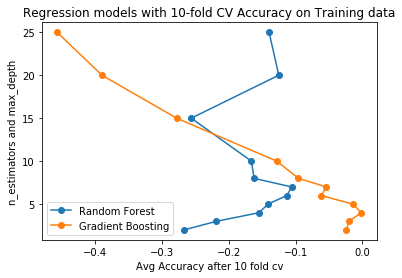

In [354]:
bag = [i for i in range(2,9)]+[i for i in range(10,30,5)]
plt.plot(holdRFRtr,bag,'-o',label = 'Random Forest')
plt.plot(holdXGBRtr,bag,'-o',label = 'Gradient Boosting')
# plt.plot(holdAdatr,bag,'-o',label = 'AdaBoosting')
plt.xlabel('Avg Accuracy after 10 fold cv')
plt.ylabel('n_estimators and max_depth')
plt.title('Regression models with 10-fold CV Accuracy on Training data')
plt.legend()

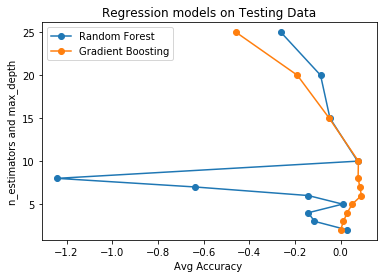

In [358]:
plt.plot(holdRFRte,bag,'-o',label = 'Random Forest')
plt.plot(holdXGBRte,bag,'-o',label = 'Gradient Boosting')
# plt.plot(holdAdatr,bag,'-o',label = 'AdaBoosting')
plt.xlabel('Avg Accuracy ')
plt.ylabel('n_estimators and max_depth')
plt.title('Regression models on Testing Data')
plt.legend()

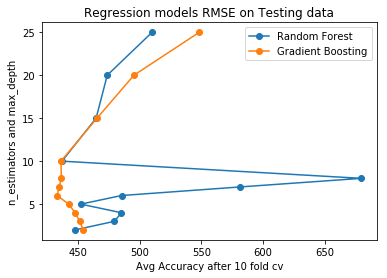

In [356]:
plt.plot(holdRFRrmse,bag,'-o',label = 'Random Forest')
plt.plot(holdXGBRrmse,bag,'-o',label = 'Gradient Boosting')
# plt.plot(holdAdatr,bag,'-o',label = 'AdaBoosting')
plt.xlabel('RMSE')
plt.ylabel('n_estimators and max_depth')
plt.title('Regression models RMSE on Testing data')
plt.legend()

In [481]:
classification_data.shape

(28126, 213)

In [482]:
clf = RandomForestClassifier(n_estimators = 7, max_depth = 7)
clf.fit(X_class,y_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [483]:
final_data = pd.read_csv('df_holdout_scholarjet.csv')

In [484]:
# -- pre-process final data --
final_data = pd.get_dummies(final_data,columns = hold_category_col_name)


In [485]:
# -- Handle ordinal columns (num_employees)--
final_data.num_employees = final_data.num_employees.replace({"None":0,"1":1,"2to5":2,"6to10":3,"11to50":4,"50plus":5})
# -- Handle ordinal columns (num_purchases_year)--
final_data.num_purchases_year = final_data.num_purchases_year.replace({'1to2':1, '25plus':5, '3to5':2, '11to25':4, 'None':0, '6to10':3})
# -- Handle ordinal columns (cost_purchases_year)--
final_data.cost_purchases_year = final_data.cost_purchases_year.replace({'lessthan1':1, '25to100':4, '1to5':2, '5to25':3, 'None':0, '100plus':5})
final_data = final_data.fillna(classification_data.mean())

In [486]:
classpredicts = clf.predict(final_data)

In [493]:
classpredicts.shape

(30375,)

In [514]:
X_reg.head()

,Unnamed: 0,cuid,convert_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Unconfirmed,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,1,20,0,5,1,1,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,1,1,0,0,1,0
1,2,57,0,2,5,4,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,1,0,0,1,0
2,3,163,0,1,2,2,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,1,1,0,0,1,0
3,4,167,0,5,2,1,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
4,5,168,0,3,4,3,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0


In [515]:
rf = GradientBoostingRegressor(n_estimators=6, learning_rate=0.1, max_depth=6)
rf.fit(X_reg,y_reg)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=6, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [516]:
raw_data.head()

,Unnamed: 0,cuid,convert_30,revenue_30,roll_up,currentstatus,companytypegroup,team,customersource,accrole,...,percemailopenedyearsixty,percemailclickedone,percemailclickedthreeone,percemailclickedseventhree,percemailclickedthirtyseven,percemailclickedsixtythirty,percemailclickedyearsixty,currentapplicability,numemaillist,dayssinceenrollment
0,1,20,0,0.0,Onboarding,Active,Business,US,External Application,None,...,0.000000,0.0,0.0,0.0,0.190476,0.000000,0.000000,3.000000,1.0,17
1,2,57,0,0.0,Onboarding,Active,Business,US,Internal Application,None,...,0.020000,0.0,0.0,0.0,0.040000,0.000000,0.020000,3.000000,1.0,70
2,3,163,0,0.0,Onboarding,Active,Business,US,Internal Application,None,...,0.106195,0.0,0.0,0.0,0.000000,0.000000,0.001770,13.000000,1.0,27
3,4,167,0,0.0,Onboarding,Enrolled,Business,US,Internal Customer Scrape,None,...,0.100000,0.0,0.0,0.0,0.000000,0.000000,0.100000,NaN,NaN,25
4,5,168,0,0.0,Onboarding,Enrolled,Business,US,Gateway,None,...,0.072072,0.0,0.0,0.0,0.009524,0.016807,0.003465,8.333333,3.0,33


In [517]:
X_reg.head()

,Unnamed: 0,cuid,convert_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Unconfirmed,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,1,20,0,5,1,1,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,1,1,0,0,1,0
1,2,57,0,2,5,4,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,1,0,0,1,0
2,3,163,0,1,2,2,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,1,1,0,0,1,0
3,4,167,0,5,2,1,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
4,5,168,0,3,4,3,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0


In [518]:
final_data.insert(2,"convert_30",classpredicts)

ValueError: cannot insert convert_30, already exists

In [519]:
final_data.head()

,Unnamed: 0,cuid,convert_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Inactive,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,0,16838,0,1,1,1,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
1,1,532175,0,3,0,0,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
2,2,532176,0,4,2,2,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
3,3,532187,0,0,0,0,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
4,4,16938,0,0,0,0,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,0,1


In [520]:
regpredicts = rf.predict(final_data)

In [521]:
final_data.head()

,Unnamed: 0,cuid,convert_30,num_employees,num_purchases_year,cost_purchases_year,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,...,currentstatus_Enrolled,currentstatus_In Progress,currentstatus_Inactive,team_CA,team_US,roll_up_Onboarding,roll_up_Retention,roll_up_Unmanaged,companytypegroup_Business,companytypegroup_Trade
0,0,16838,0,1,1,1,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
1,1,532175,0,3,0,0,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
2,2,532176,0,4,2,2,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
3,3,532187,0,0,0,0,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,1,0
4,4,16938,0,0,0,0,0.022367,0.037827,0.078231,0.336425,...,1,0,0,0,1,1,0,0,0,1


In [531]:
cuid = final_data['cuid']

In [532]:
final_submission = pd.DataFrame({'CuID':cuid,'pred_convert_30':classpredicts,'pred_revenue_30':regpredicts})

In [533]:
final_submission.head(20)

,CuID,pred_convert_30,pred_revenue_30
0,16838,0,39.878800
1,532175,0,39.878800
2,532176,0,39.878800
3,532187,0,39.878800
4,16938,0,39.878800
5,532189,0,39.878800
6,16948,0,39.878800
7,532197,0,39.878800
8,17017,0,39.878800
9,17020,0,39.878800


In [534]:
final_submission.describe()

,CuID,pred_convert_30,pred_revenue_30
count,30375.000000,30375.000000,30375.000000
mean,292851.986173,0.011292,46.543951
std,169331.257016,0.105665,126.534631
min,4.000000,0.000000,39.878800
25%,146714.500000,0.000000,39.878800
50%,293176.000000,0.000000,39.878800
75%,439250.000000,0.000000,39.878800
max,585781.000000,1.000000,11918.776243


# Challenge faced

#### Change the minimum value to 0 since no conversion means no revenue

In [535]:
mini = final_submission['pred_revenue_30'].min()
mini

39.87879970818128

In [537]:
final_submission['pred_revenue_30'].loc[(final_submission['pred_revenue_30'] == mini)] = 0

D:\Anaconda\ana\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [538]:
final_submission.head(20)

,CuID,pred_convert_30,pred_revenue_30
0,16838,0,0.000000
1,532175,0,0.000000
2,532176,0,0.000000
3,532187,0,0.000000
4,16938,0,0.000000
5,532189,0,0.000000
6,16948,0,0.000000
7,532197,0,0.000000
8,17017,0,0.000000
9,17020,0,0.000000


In [539]:
final_submission.describe()

,CuID,pred_convert_30,pred_revenue_30
count,30375.000000,30375.000000,30375.000000
mean,292851.986173,0.011292,7.115470
std,169331.257016,0.105665,128.663824
min,4.000000,0.000000,0.000000
25%,146714.500000,0.000000,0.000000
50%,293176.000000,0.000000,0.000000
75%,439250.000000,0.000000,0.000000
max,585781.000000,1.000000,11918.776243


In [541]:
final_submission.to_csv('Wayfair_Competition_Submission.csv',index=False)